 **Analyze Mental Health Affecting Factors**



---



This dataset contains the following data:

* Timestamp

* Age

* Gender

* Country

* state: If you live in the United States, which state or territory do you live in?

* self_employed: Are you self-employed?

* family_history: Do you have a family history of mental illness?

* treatment: Have you sought treatment for a mental health condition?

* work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

* no_employees: How many employees does your company or organization have?

* remote_work: Do you work remotely (outside of an office) at least 50% of the time?

* tech_company: Is your employer primarily a tech company/organization?

* benefits: Does your employer provide mental health benefits?

* care_options: Do you know the options for mental health care your employer provides?

* wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

* seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

* anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

* leave: How easy is it for you to take medical leave for a mental health condition?

* mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

* physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

* coworkers: Would you be willing to discuss a mental health issue with your coworkers?

* supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

* mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

* physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

* mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

* obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

* comments: Any additional notes or comments




# **Importing packages and data**

## Importing libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

## Reading Data



In [3]:
data=pd.read_csv("survey.csv")

## Examining Data



In [4]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,12-09-2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,26-09-2015 01:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,07-11-2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,30-11-2015 21:25,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [5]:
data.head().T


,0,1,2,3,4
Timestamp,27-08-2014 11:29,27-08-2014 11:29,27-08-2014 11:29,27-08-2014 11:29,27-08-2014 11:30
Age,37,44,32,31,31
Gender,Female,M,Male,Male,Male
Country,United States,United States,Canada,United Kingdom,United States
state,IL,IN,NaN,NaN,TX
self_employed,NaN,NaN,NaN,NaN,NaN
family_history,No,No,No,Yes,No
treatment,Yes,No,No,Yes,No
work_interfere,Often,Rarely,Rarely,Often,Never
no_employees,Jun-25,More than 1000,Jun-25,26-100,100-500


In [6]:
data.shape

(1259, 27)

In [7]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [8]:
data.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [9]:
data.describe(include='all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,884,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,27-08-2014 12:31,NaN,Male,United States,CA,No,No,Yes,Sometimes,Jun-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,8,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

## Examining values



In [11]:
data['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [12]:
data['Age'].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72         

In [13]:
data['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [14]:
data['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [15]:
data['family_history'].value_counts()

No     767
Yes    492
Name: family_history, dtype: int64

In [16]:
data['tech_company'].value_counts()

Yes    1031
No      228
Name: tech_company, dtype: int64

In [17]:
data['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [18]:
data['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64



---



# **Data Cleaning**

## Deleting unnecessary columns



In [19]:
columns_to_drop = ['Timestamp','state','comments']

In [20]:
data1=data.drop(columns=columns_to_drop)

In [21]:
data1.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,Jun-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,Jun-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


## Handling missing values



In [22]:
data1.shape

(1259, 24)

In [23]:
data1.isnull().values.any()

True

In [24]:
data1.isnull()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1255,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1256,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1257,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
data1.isnull().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [26]:
print(data1['self_employed'].isnull().sum())
print(data1['work_interfere'].isnull().sum())

18
264


In [27]:
print(data1['self_employed'].unique())
data1['self_employed'].fillna('No', inplace=True)
print(data1['work_interfere'].unique())
data1['work_interfere'].fillna("Don't Know", inplace=True)

[nan 'Yes' 'No']
['Often' 'Rarely' 'Never' 'Sometimes' nan]


In [28]:
print(data1['self_employed'].unique())
print(data1['work_interfere'].unique())

['No' 'Yes']
['Often' 'Rarely' 'Never' 'Sometimes' "Don't Know"]


In [29]:
data1.isnull().values.any()

False

In [30]:
data1.shape

(1259, 24)

## Handling noisy data


In [31]:
unique_in_column = {}
for column in data1.columns:
    unique_in_column[column] = data1[column].unique()


### Gender

In [32]:
# Cleaning gender
data1['Gender'].isnull().values.any()

False

In [33]:
data1['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [34]:
data1['Gender']=data1['Gender'].str.strip()
print(data1['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Man'
 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer' 'Female (cis)'
 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail' 'Cis Man'
 'ostensibly male, unsure what that really means']


In [35]:
gender = data1['Gender'].str.lower()

In [36]:
male1 = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans1 = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female1 = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in data1.iterrows():

    if str.lower(col.Gender) in male1:
        data1['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female1:
        data1['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans1:
        data1['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#These genders are nonsense
stk_list = ['A little about you', 'p']
data1 = data1[~data1['Gender'].isin(stk_list)]

print(data1['Gender'].unique())

['female' 'male' 'trans']


In [37]:
data1['Gender'].value_counts()

male      991
female    247
trans      19
Name: Gender, dtype: int64



### Age



In [38]:
#Cleaning Age
data1['Age'].isnull().values.any()

False

In [39]:
print(data1['Age'].unique())

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61          11          72]


In [40]:
#Fill null values with median()
#data1['Age'].fillna(data1['Age'].median(), inplace=True)

#Age has some outliers which will affect mean more than median. So we are preferring median.

#Fill values <18 and >66 with median()
s = pd.Series(data1['Age'])
s[s<18] = data1['Age'].median()
data1['Age'] = s

s = pd.Series(data1['Age'])
s[s>66] = data1['Age'].median()
data1['Age'] = s

data1['Age'].value_counts()

29    85
32    82
26    75
31    74
27    71
33    70
28    68
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
57     3
54     3
47     2
60     2
58     1
62     1
65     1
53     1
61     1
Name: Age, dtype: int64

### Country



In [41]:
data1['Country'].value_counts()

United States             750
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Greece                      2
Denmark                     2
Colombia                    2
Portugal                    2
Croatia                     2
Moldova                     1
Georgia                     1
Nigeria                     1
China                       1
Thailand  

In [42]:
data1 = data1.loc[(data1['Country'] == 'United States') | (data1['Country'] == 'United Kingdom') | (data1['Country'] == 'Canada') | (data1['Country'] == 'Germany') | (data1['Country'] == 'Netherlands') | (data1['Country'] == 'Ireland') | (data1['Country'] == 'Australia') | (data1['Country'] == 'France') | (data1['Country'] == 'India')]
print(data1['Country'].unique())

['United States' 'Canada' 'United Kingdom' 'France' 'Netherlands'
 'Australia' 'Germany' 'Ireland' 'India']


In [43]:
data1['Country'].value_counts()

United States     750
United Kingdom    185
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
Name: Country, dtype: int64

### Self Employed

In [44]:
data1['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [45]:
data1['self_employed'].replace({'Yes':1,'No':0},inplace=True)
data1

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,0,No,Yes,Often,Jun-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,0,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,0,No,No,Rarely,Jun-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,0,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,0,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,0,No,Yes,Don't Know,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,male,United States,0,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,0,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,female,United States,0,No,No,Don't Know,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [46]:
print(data1['self_employed'].value_counts())
#As we can see most of the employees are working for tech companies
print(data1['tech_company'].value_counts())
print(data1['seek_help'].value_counts())

0    1024
1     126
Name: self_employed, dtype: int64
Yes    934
No     216
Name: tech_company, dtype: int64
No            559
Don't know    350
Yes           241
Name: seek_help, dtype: int64


In [47]:
data1.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,0,No,Yes,Often,Jun-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,0,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,0,No,No,Rarely,Jun-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,0,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,0,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# **Data Integration**




## Redundancy Check

### Correlation Analysis

/var/folders/9p/krt4vhn17ls6fxrd79rqftk00000gn/T/ipykernel_11233/1613399737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = data1.corr()


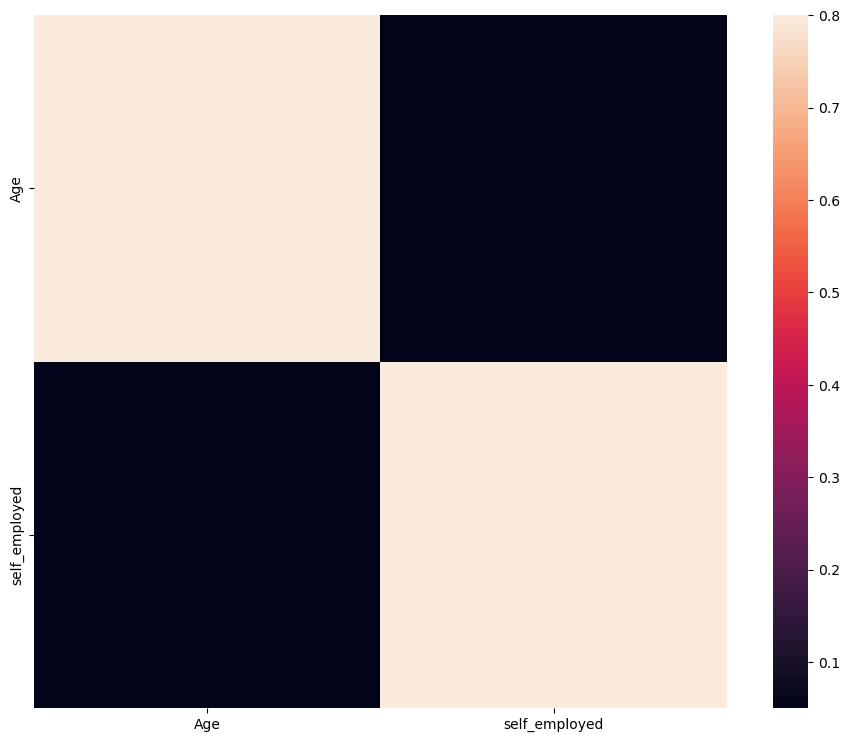

In [48]:
corr1 = data1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr1, vmax=.8, square=True);
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

### Covariance

In [49]:
data1.cov()

/var/folders/9p/krt4vhn17ls6fxrd79rqftk00000gn/T/ipykernel_11233/3958846974.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.cov()


,Age,self_employed
Age,51.704037,0.112526
self_employed,0.112526,0.097646


# **Data Transformation**

### Smoothing by Binning Age



In [50]:
data1['Age_range'] = pd.cut(data1['Age'], [18,20,30,50,65], labels=["18-20", "21-30", "31-50", "51-65"], include_lowest=True)
data1

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_range
0,37,female,United States,0,No,Yes,Often,Jun-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-50
1,44,male,United States,0,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-50
2,32,male,Canada,0,No,No,Rarely,Jun-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-50
3,31,male,United Kingdom,0,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31-50
4,31,male,United States,0,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,0,No,Yes,Don't Know,26-100,No,Yes,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,21-30
1255,32,male,United States,0,Yes,Yes,Often,26-100,Yes,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,31-50
1256,34,male,United States,0,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,31-50
1257,46,female,United States,0,No,No,Don't Know,100-500,Yes,Yes,...,Don't know,Yes,No,No,No,No,No,No,No,31-50


### Normalization



> Min Max



In [51]:
df = data1.copy()

scaling=MinMaxScaler()
scaling.fit_transform(df[['Age']])

array([[0.40425532],
       [0.55319149],
       [0.29787234],
       ...,
       [0.34042553],
       [0.59574468],
       [0.14893617]])



> Z score



In [52]:
from sklearn.preprocessing import StandardScaler
  
scaling=StandardScaler()
scaling.fit_transform(df[['Age']])

array([[ 0.67279342],
       [ 1.64671664],
       [-0.02286602],
       ...,
       [ 0.25539775],
       [ 1.92498041],
       [-0.99678924]])

### Plots

Visualizing the data

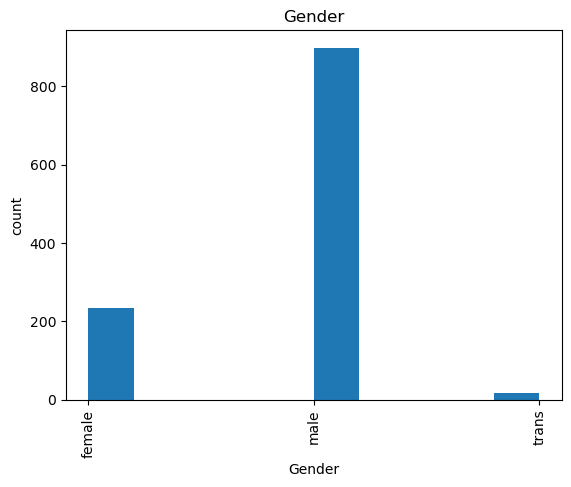

In [53]:
plt.hist(data1['Gender'],orientation ='vertical')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('count')
gender=('female','male','trans')
index=np.arange(len(gender))
plt.xticks(index, gender, rotation=90)
plt.show()

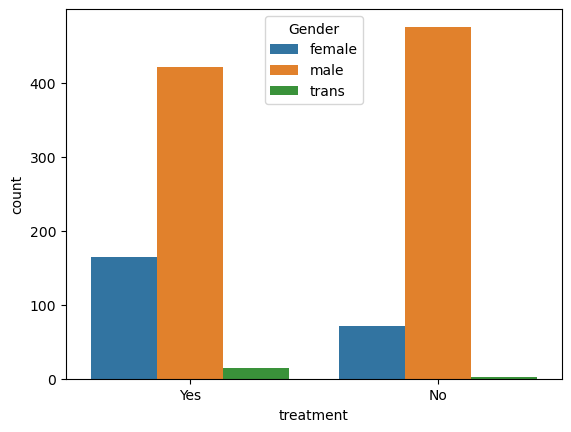

In [54]:
sns.countplot(x='treatment',hue='Gender',data=data1)
plt.savefig('gendervstreat.png')

<Axes: xlabel='treatment', ylabel='count'>

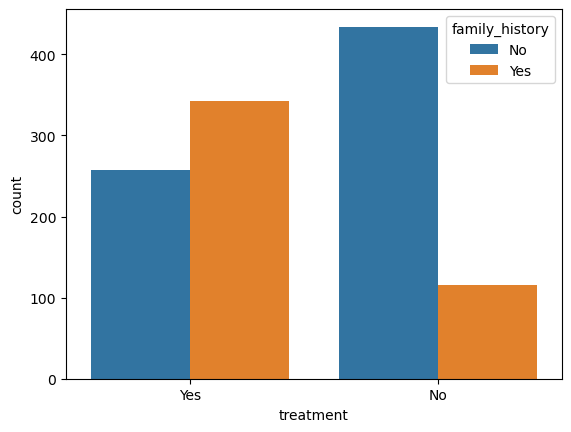

In [55]:
sns.countplot(x='treatment',hue='family_history',data=data1)

<Axes: xlabel='Country', ylabel='count'>

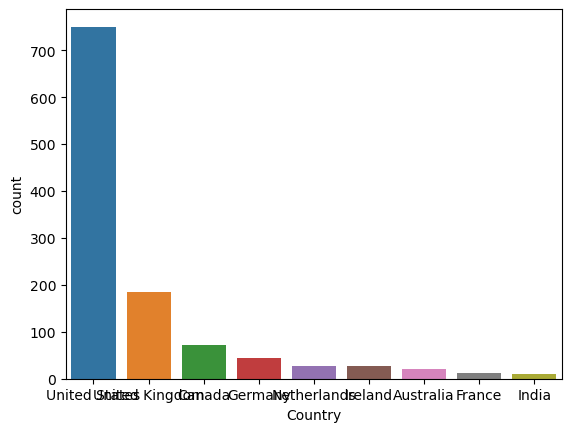

In [56]:
sns.countplot(x='Country',data=data1,order=data1['Country'].value_counts().index)

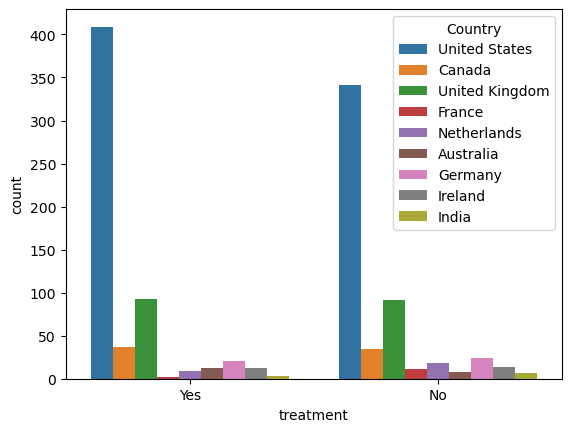

In [57]:
sns.countplot(x='treatment',hue='Country',data=data1)
plt.savefig('countryvstreat.png')

<Axes: xlabel='count', ylabel='Age'>

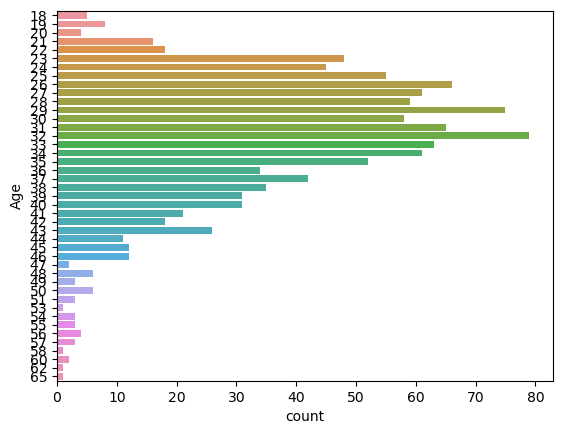

In [58]:
sns.countplot(y='Age',data=data1)

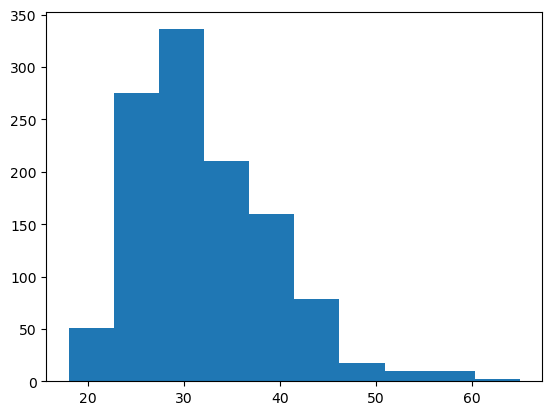

In [59]:
plt.hist(data1['Age'],orientation ='vertical')
ax.set_title("Histogram")
ax.set_xticks([18,20,30,50,65])
ax.set_xlabel('Age')
ax.set_ylabel('count')
plt.show()

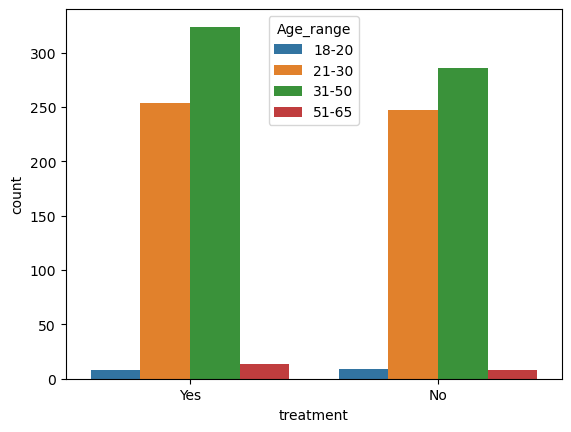

In [60]:
sns.countplot(x='treatment',hue='Age_range',data=data1)
plt.savefig('agevstreat.png')

In [62]:
#Encoding data
labelDict = {}

for feature in df1:
    le = preprocessing.LabelEncoder()
    le.fit(df1[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df1[feature] = le.transform(df1[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)


label_Age [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
label_Gender [0, 1, 2]
label_Country [0, 1, 2, 3, 4, 5, 6, 7, 8]
label_self_employed [0, 1]
label_family_history [0, 1]
label_treatment [0, 1]
label_work_interfere [0, 1, 2, 3, 4]
label_no_employees [0, 1, 2, 3, 4, 5]
label_remote_work [0, 1]
label_tech_company [0, 1]
label_benefits [0, 1, 2]
label_care_options [0, 1, 2]
label_wellness_program [0, 1, 2]
label_seek_help [0, 1, 2]
label_anonymity [0, 1, 2]
label_leave [0, 1, 2, 3, 4]
label_mental_health_consequence [0, 1, 2]
label_phys_health_consequence [0, 1, 2]
label_coworkers [0, 1, 2]
label_supervisor [0, 1, 2]
label_mental_health_interview [0, 1, 2]
label_phys_health_interview [0, 1, 2]
label_mental_vs_physical [0, 1, 2]
label_obs_consequence [0, 1]
label_Age_range [0, 1, 2, 3]


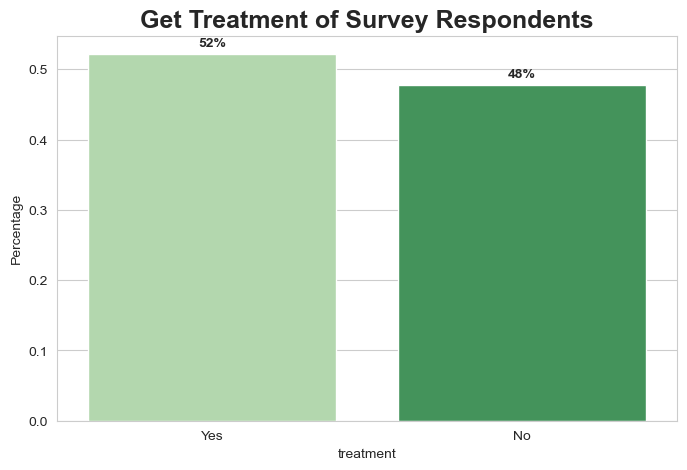

In [63]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = percentage.head(10), palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.savefig('treat.png')

ValueError: Cannot use `hue` without `x` and `y`

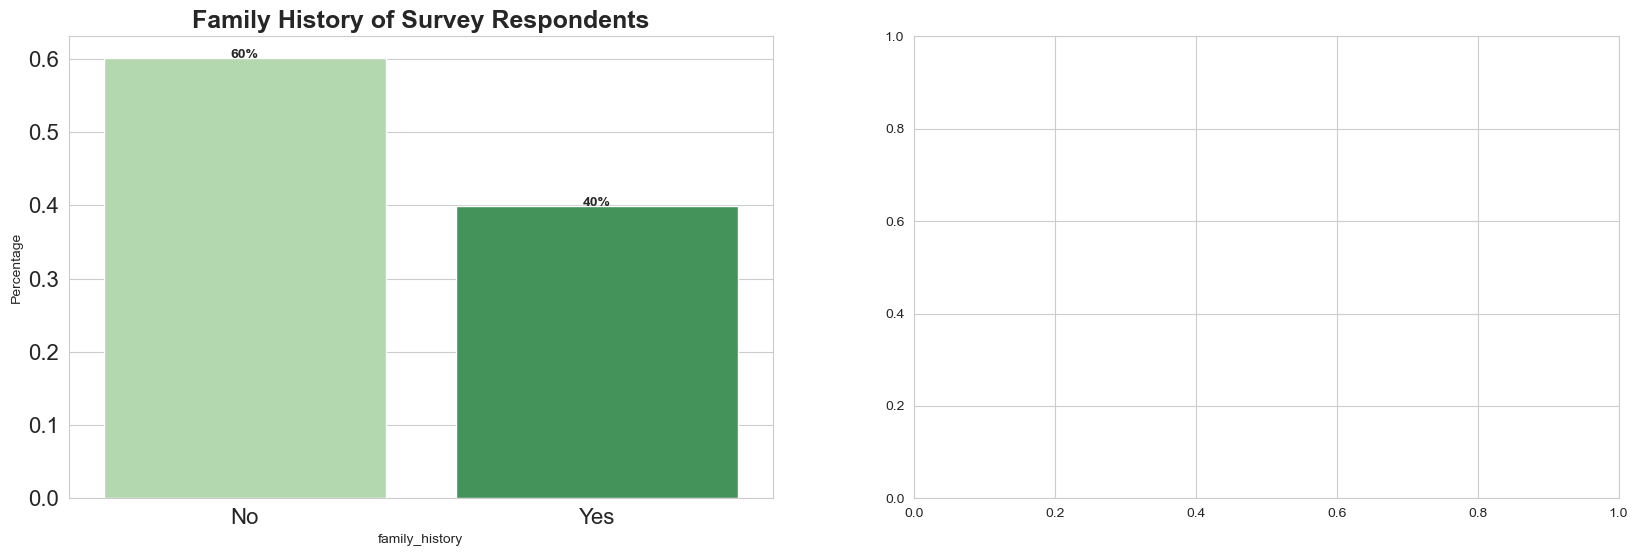

In [64]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
percentage = df['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'family_history', y = 'Percentage', data = percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.0), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['family_history'], hue = df['treatment'], palette='Greens')
plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.savefig('famhistvstreat.png')
plt.show()


In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
percentage = df['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'remote_work', y = 'Percentage', data = percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Type of Work', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['remote_work'], hue = df['treatment'], palette='Greens')
plt.title('Type of Work', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.savefig('remworkvstreat.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: Cannot use `hue` without `x` and `y`

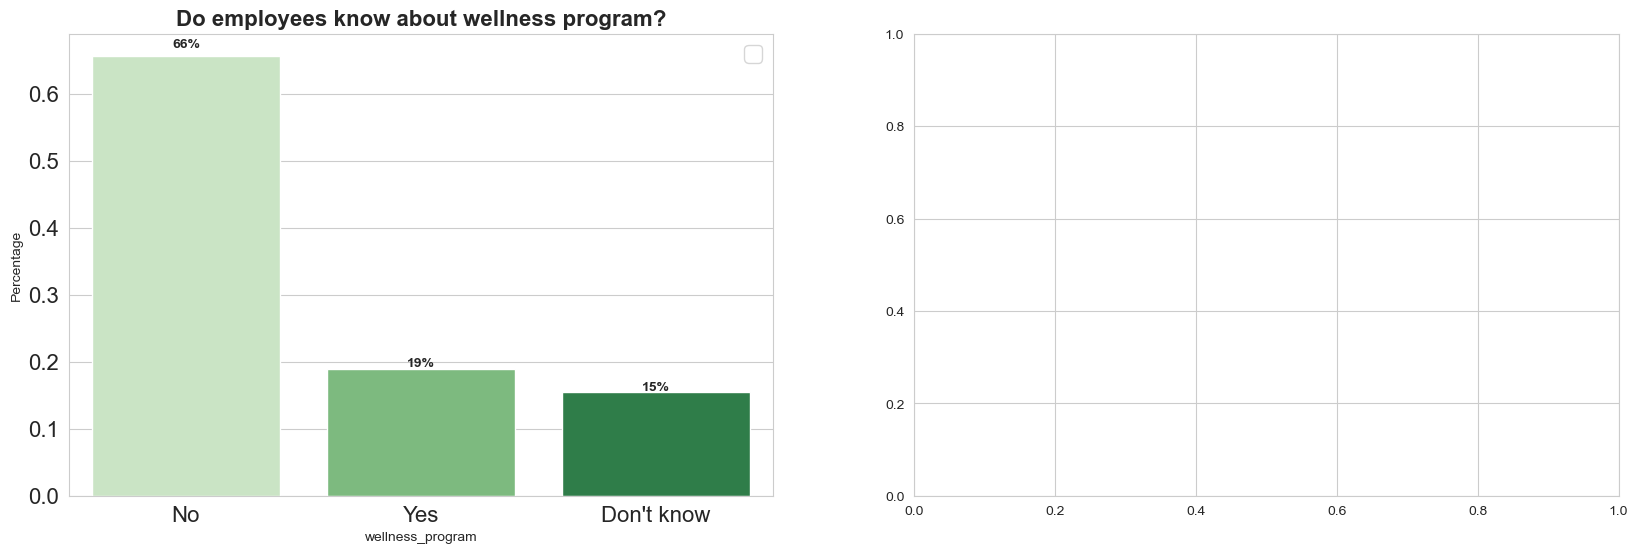

In [65]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
percentage = df['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Do employees know about wellness program?', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['wellness_program'], hue = df['treatment'], palette='Greens')
plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.savefig('wellprogvstreat.png')

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
percentage = df['anonymity'].value_counts(normalize = True).rename_axis('anonymity').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'anonymity', y = 'Percentage', data = percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Is anonymity preserved?', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['anonymity'], hue = df['treatment'], palette='Greens')
plt.title('Anonymity for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.savefig('anonymvstreat.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: Cannot use `hue` without `x` and `y`

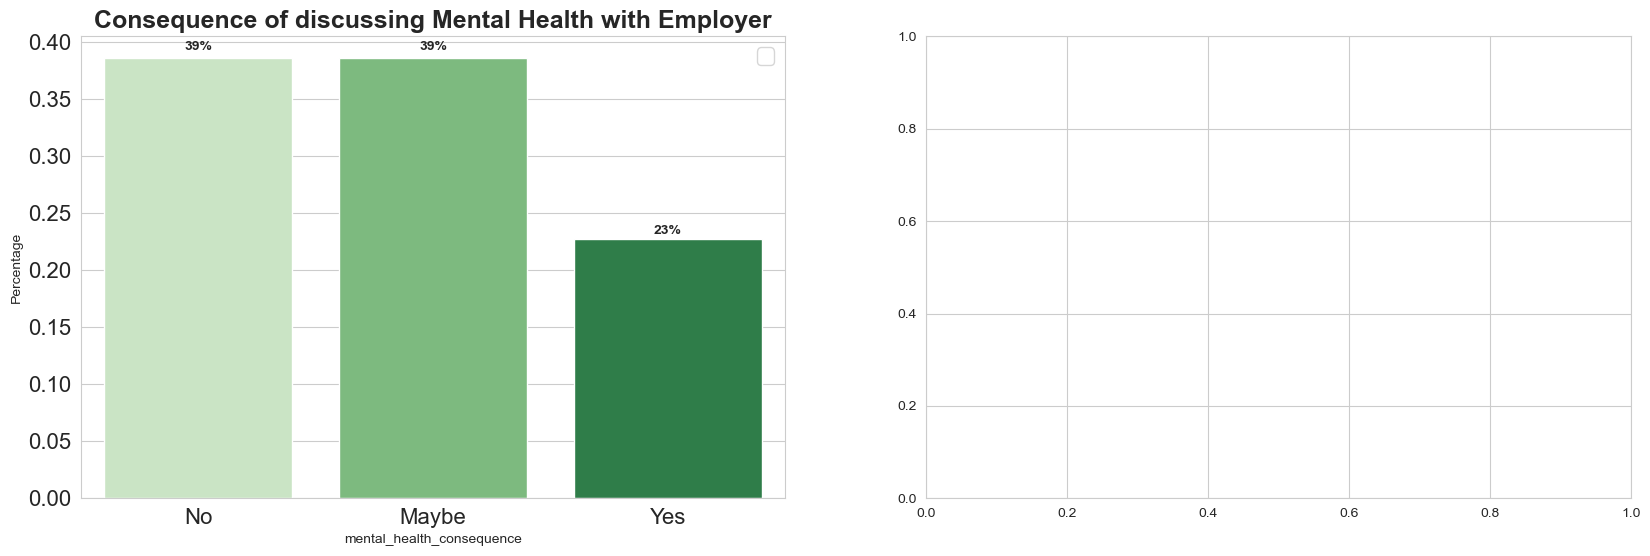

In [66]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
percentage = df['mental_health_consequence'].value_counts(normalize = True).rename_axis('mental_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_consequence', y = 'Percentage', data =  percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['mental_health_consequence'], hue = df['treatment'], palette='Greens')
plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.savefig('consqvstreat.png')

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data =  percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Does it interfere with work', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['work_interfere'], hue = df['treatment'], palette='Greens')
plt.title('Are you getting treatment if there is interference', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.savefig('interferevstreat.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: Cannot use `hue` without `x` and `y`

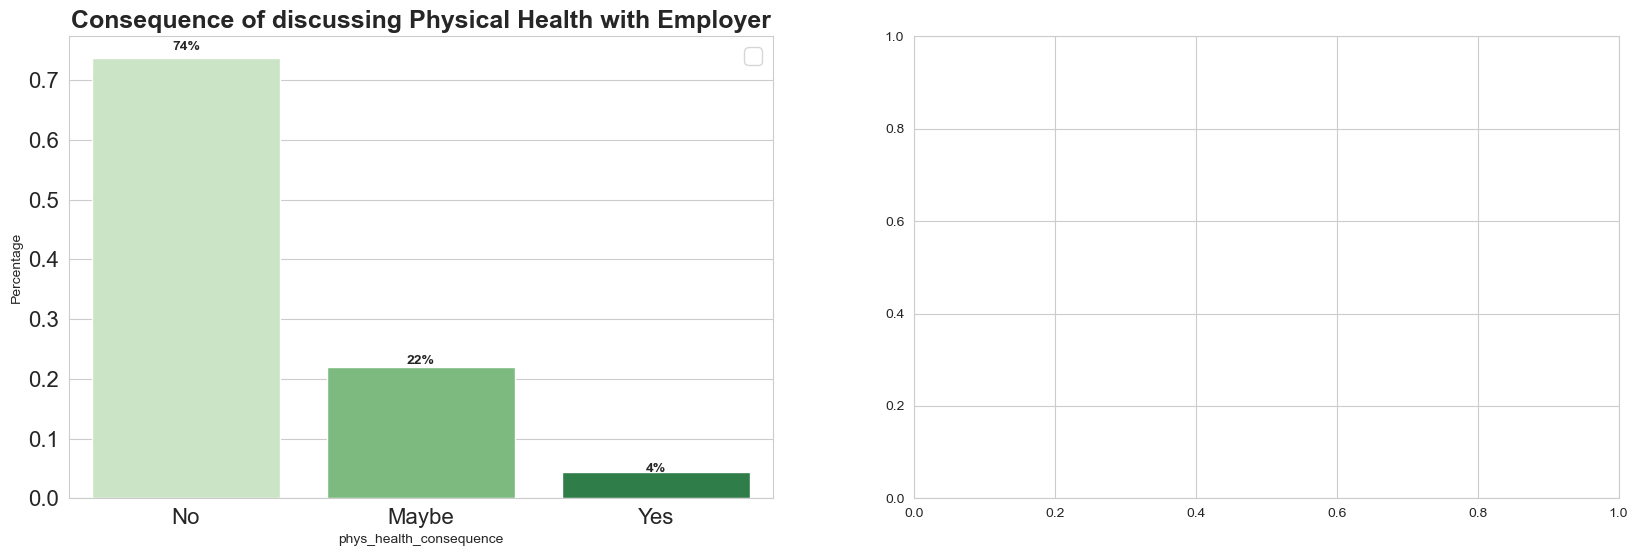

In [67]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
percentage = df['phys_health_consequence'].value_counts(normalize = True).rename_axis('phys_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_consequence', y = 'Percentage', data = percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['phys_health_consequence'], hue = df['treatment'], palette='Greens')
plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.savefig('discussvstreat.png')

Prediction Analysis

Splitting Data
Target = Treatment

In [68]:
feature_cols = ['Country', 'Age', 'Gender', 'family_history', 'benefits', 'work_interfere','mental_health_consequence','anonymity','wellness_program','phys_health_consequence' ]
X = df1[feature_cols]
y = df1.treatment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [70]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [71]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Logistic Regression:
Accuracy: 0.8057971014492754
Percentage of ones: 0.5362318840579711
Percentage of zeros: 0.46376811594202894
True: [1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0]
Pred: [1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1]


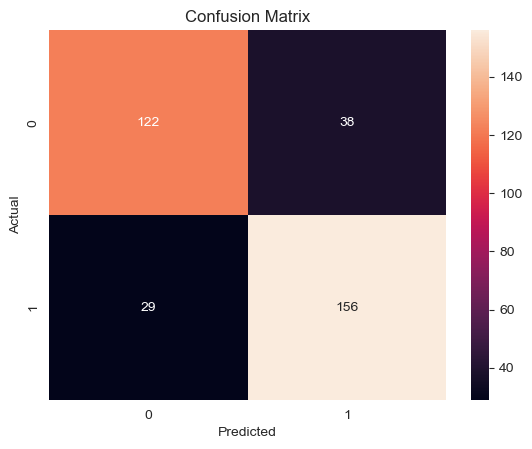

In [72]:
#Since dependant variable(target) is categorical
def logisticRegression():

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    y_pred_class = logreg.predict(X_test)
    
    print('Logistic Regression:')
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
   
logisticRegression()

In [73]:
#Lots of features
def treeClassifier():

    tree = DecisionTreeClassifier()

    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=10, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    y_pred_class = tree.predict(X_test)
    
    print('Tree classifier:')
    
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

Tree classifier:
Accuracy: 0.855072463768116
Percentage of ones: 0.5362318840579711
Percentage of zeros: 0.46376811594202894
True: [1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0]
Pred: [1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1]


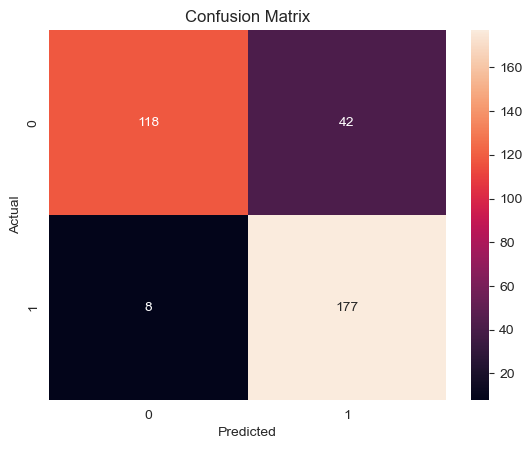

In [74]:
treeClassifier()

In [75]:
def randomForest():

    forest = RandomForestClassifier(n_estimators = 20)

    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
    y_pred_class = my_forest.predict(X_test)
    
    print('Random Forests:')
    
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

Random Forests:
Accuracy: 0.8347826086956521
Percentage of ones: 0.5362318840579711
Percentage of zeros: 0.46376811594202894
True: [1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0]
Pred: [1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1]


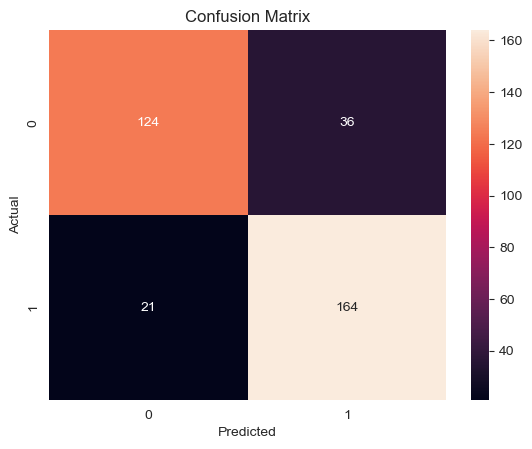

In [76]:
randomForest()

In [77]:
df1.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Age_range'],
      dtype='object')

In [78]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [79]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8289855072463768


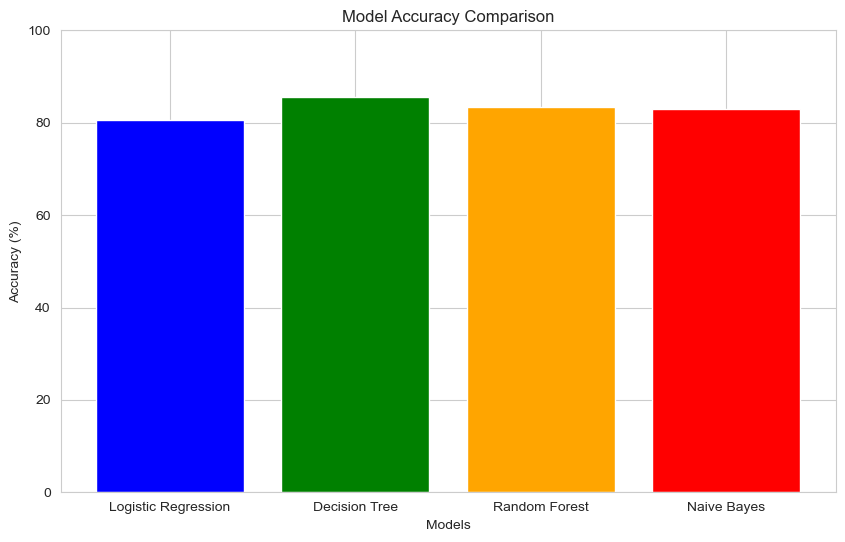

In [80]:
# Accuracy scores for each model
accuracy_scores = [80.6, 85.5, 83.5, 82.9]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes']

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim([0, 100])  # Set y-axis limit to percentage scale
plt.show()